In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Original DF:  (442, 11)
X shape (Independent variables):  (442, 10)
y shape (Dependent variable):  (442, 1)


<Axes: >

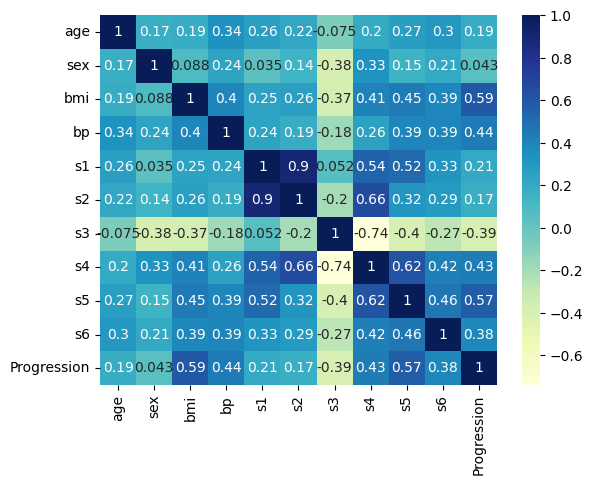

In [14]:
# independent - Everything else other than 'Progression'
# dependent   - Progression
X = df.drop('Progression', axis=1) # Only independent
y = df[['Progression']] # Only dependent
print("Original DF: ", df.shape)
print("X shape (Independent variables): ", X.shape)
print("y shape (Dependent variable): ", y.shape)

sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
# From this we see that All columns have a positive correlation, some small and large



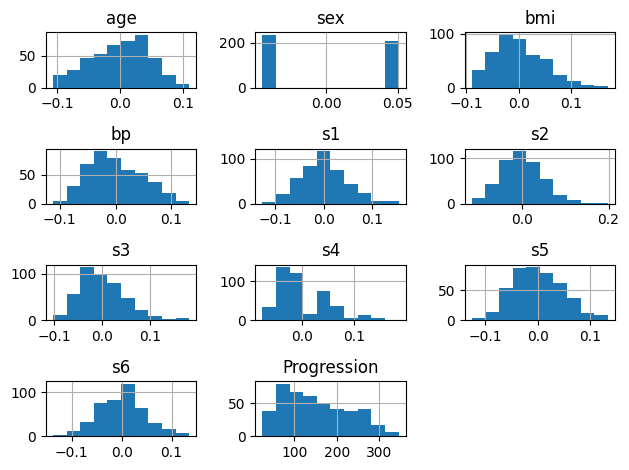

In [9]:
df.hist()
plt.tight_layout()
# visualise data via histogram

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print ("Training data")
print("    X_train: ", X_train.shape)
print("    y_train: ", y_train.shape)
print("Test data")
print("    X_test: ", X_test.shape)
print("    y_test: ", y_test.shape)


Training data
    X_train:  (353, 10)
    y_train:  (353, 1)
Test data
    X_test:  (89, 10)
    y_test:  (89, 1)


In [19]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Initialise both scales
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

#Train both scales
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.fit_transform(X_test)

X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.fit_transform(X_test)

print("Shape of X_train_min_max:", X_train_min_max.shape)
print("Shape of X_train_standard:", X_train_standard.shape)
print("Shape of X_test_min_max:", X_test_min_max.shape)
print("Shape of X_test_standard:", X_test_standard.shape)

Shape of X_train_min_max: (353, 10)
Shape of X_train_standard: (353, 10)
Shape of X_test_min_max: (89, 10)
Shape of X_test_standard: (89, 10)


In [20]:
#fit scales to model
# Initialise empty regression
multi_reg_model_min_max = LinearRegression()
multi_reg_model_standard = LinearRegression()

#Fit to model
multi_reg_model_min_max.fit(X_train_min_max, y_train)
multi_reg_model_standard.fit(X_train_standard, y_train)

# Predict
y_pred_min_max = multi_reg_model_min_max.predict(X_test_min_max)
y_pred_standard = multi_reg_model_standard.predict(X_test_standard)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
mse_min_max = mean_squared_error(y_test, y_pred_min_max)
r2_min_max = r2_score(y_test, y_pred_min_max)
mae_min_max = mean_absolute_error(y_test, y_pred_min_max)

mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)
mae_standard = mean_absolute_error(y_test, y_pred_standard)

print("MIN MAX")
print("mean_squared_error: ", mse_min_max)
print("r2_score: ", r2_min_max)
print("mean_absolute_error: ", mae_min_max)
print("intercept_: ", multi_reg_model_min_max.intercept_)
print("coef_: ", multi_reg_model_min_max.coef_)

print("\n\nSCALED")
print("mean_squared_error: ", mse_standard)
print("r2_score: ", r2_standard)
print("mean_absolute_error: ", mae_standard)
print("intercept_: ", multi_reg_model_standard.intercept_)
print("coef_: ", multi_reg_model_standard.coef_)

# Note - i dont know if i have done this right

# r2 is higher in the StandardScaler, which suggests that this may be a better tool to measure our dataset.

MIN MAX
mean_squared_error:  3109.163623467834
r2_score:  0.41316070753572687
mean_absolute_error:  43.485524651662
intercept_:  [-25.13322785]
coef_:  [[   8.2612689   -23.06446772  135.63561351   84.9935688  -244.80178532
   162.87932677   46.32729542   72.03113268  191.18672297   13.3055384 ]]


SCALED
mean_squared_error:  2972.851534699923
r2_score:  0.43888894168947234
mean_absolute_error:  43.245475552753014
intercept_:  [153.73654391]
coef_:  [[  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
   24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]]


In [23]:
print("Predicted values - Min Max:\n", y_pred_min_max)

Predicted values: [[169.3407783 ]
 [173.60508232]
 [163.32447578]
 [334.13621368]
 [135.0850323 ]
 [104.22602355]
 [272.93251995]
 [217.71966425]
 [ 89.92585719]
 [109.60737726]
 [ 95.6217692 ]
 [166.93127534]
 [ 21.37832101]
 [230.36379021]
 [ 94.63185704]
 [110.79568449]
 [242.59762318]
 [273.93784942]
 [178.26017648]
 [236.72832617]
 [214.89207375]
 [ 88.51977169]
 [ 52.52417127]
 [206.60057117]
 [145.79119499]
 [156.72551182]
 [188.43188455]
 [184.22523074]
 [ 24.51299975]
 [115.56950219]
 [165.12269855]
 [ 74.24365748]
 [132.63920596]
 [197.09383317]
 [183.34533668]
 [216.24934231]
 [125.95768453]
 [130.97440371]
 [164.35766778]
 [ 40.7167352 ]
 [ 59.30259243]
 [105.5126796 ]
 [162.76601313]
 [165.12466527]
 [196.57343414]
 [ 48.85394652]
 [ 44.57401724]
 [101.05205351]
 [ 27.223869  ]
 [171.07611969]
 [123.00310381]
 [ 45.41666878]
 [ 87.65254376]
 [101.19053097]
 [215.32610888]
 [136.73693412]
 [ 93.7979476 ]
 [211.95456881]
 [114.17721691]
 [ 57.0682021 ]
 [214.03417165]
 [207.

In [25]:
print("Predicted values: - Standard Scaler:\n", y_pred_standard)

Predicted values: - Standard Scaler:
 [[149.75685653]
 [191.23894878]
 [144.99765835]
 [308.2392461 ]
 [135.55185658]
 [101.11224602]
 [269.52744222]
 [194.08720525]
 [102.71279275]
 [118.74805116]
 [104.00999166]
 [182.3985081 ]
 [ 63.75470836]
 [222.58497547]
 [112.88024423]
 [142.88173554]
 [232.5232517 ]
 [265.55754803]
 [212.47025262]
 [233.06931101]
 [219.77085051]
 [ 97.16940484]
 [ 79.87840784]
 [203.12202014]
 [165.17609256]
 [172.95901167]
 [201.65514889]
 [196.37081952]
 [ 57.15895691]
 [120.31482889]
 [183.09312592]
 [ 96.80797149]
 [142.66542464]
 [199.39529609]
 [183.05559088]
 [203.0955264 ]
 [136.64072601]
 [131.6510423 ]
 [161.32453782]
 [ 67.29605716]
 [ 82.3243273 ]
 [120.3548651 ]
 [180.07818504]
 [167.78833731]
 [185.60340222]
 [ 69.74095708]
 [ 80.71614044]
 [126.40349108]
 [ 61.95206421]
 [179.21497496]
 [161.70371134]
 [ 72.54003606]
 [112.89003338]
 [120.07078536]
 [191.22782172]
 [164.38704828]
 [104.59273454]
 [224.0885385 ]
 [130.33918852]
 [ 86.18585062]
 [